In [26]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Year 2012

Load the data and exclude non-useful columns

In [27]:
## Load data
field_2012 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2012-01-01_2012-12-31.csv')

In [28]:
# Check columns
field_2012.columns.tolist()

['Experiment_Id',
 'SP_ID',
 'sample_distance (m)',
 'Field',
 'Flume',
 'Sample_date',
 'Sample_time',
 'comments',
 'Start_Sample_Date',
 'GPS_Sample_Nr',
 'Easting',
 'Northing',
 'pH',
 'pH Quality',
 'pH Quality Last Modified',
 'Bulk density (g/cm3)',
 'Bulk density Quality',
 'Bulk density Quality Last Modified',
 'SOM (% of DM)',
 'SOM Quality',
 'SOM Quality Last Modified',
 'Total-N (% of DM)',
 'Total-N Quality',
 'Total-N Quality Last Modified',
 'Total-C (% of DM)',
 'Total-C Quality',
 'Total-C Quality Last Modified',
 'delta vs air - 15N',
 'delta vs air - 15N Quality',
 'delta vs air - 15N Quality Last Modified',
 'delta vs PDB - 13C',
 'delta vs PDB - 13C Quality',
 'delta vs PDB - 13C Quality Last Modified']

In [29]:
# Columns to drop
drop_columns_2012 = ['pH Quality Last Modified', 'Bulk density Quality', 'Bulk density Quality Last Modified',
               'pH Quality', 'Total-N Quality', 'Total-N Quality Last Modified', 'Total-C Quality', 
                'Total-C Quality Last Modified', 'delta vs air - 15N', 'delta vs air - 15N Quality',
                'delta vs air - 15N Quality Last Modified', 'delta vs PDB - 13C', 'SOM Quality Last Modified',
                'delta vs PDB - 13C Quality', 'delta vs PDB - 13C Quality Last Modified', 'comments', 'SOM Quality',
                'Start_Sample_Date', 'GPS_Sample_Nr', 'Flume']

In [30]:
# Dictionary with names
dict_names_2012 = {'Bulk density (g/cm3)': 'BD_gcm3', 'SOM (% of DM)': 'OM_%w/w', 
              'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [31]:
# Drop columns
field_2012.drop(drop_columns_2012, axis = 1 , inplace = True)

In [32]:
# Aglimpse on the data
field_2012.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Bulk density (g/cm3),SOM (% of DM),Total-N (% of DM),Total-C (% of DM)
0,FP003,1,50,Pecketsford,06/06/2012,12:00:00,265632,99300,5.18,0.916,10.1,0.51,4.742
1,FP003,2,50,Pecketsford,06/06/2012,12:00:00,265625,99275,5.23,0.943,10.4,0.55,4.980
2,FP003,7,50,Pecketsford,06/06/2012,12:00:00,265575,99225,5.54,0.948,11.8,0.64,5.610
3,FP003,9,50,Pecketsford,06/06/2012,12:00:00,265625,99225,5.12,0.857,10.9,0.54,4.510
4,FP003,17,50,Pecketsford,06/06/2012,12:00:00,265575,99175,5.68,0.946,11.5,0.59,5.340


In [33]:
# Rename columns
field_2012.rename(columns = dict_names_2012, inplace = True)

In [34]:
# Info
field_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        264 non-null    object 
 1   SP_ID                264 non-null    int64  
 2   sample_distance (m)  264 non-null    int64  
 3   Field                264 non-null    object 
 4   Sample_date          264 non-null    object 
 5   Sample_time          264 non-null    object 
 6   Easting              264 non-null    int64  
 7   Northing             264 non-null    int64  
 8   pH                   264 non-null    float64
 9   BD_gcm3              264 non-null    float64
 10  OM_%w/w              264 non-null    float64
 11  N_total_%w/w         263 non-null    float64
 12  C_total_%w/w         263 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 26.9+ KB


In [35]:
# Convert object to datetime
field_2012['Sample_date'] = pd.to_datetime(field_2012['Sample_date'])

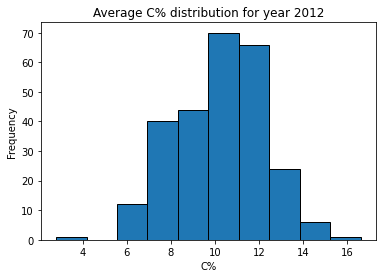

In [36]:
# Plot C% distribution
field_2012['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.title('Average C% distribution for year 2012')
plt.xlabel('C%')
plt.ylabel('Frequency')
plt.show()

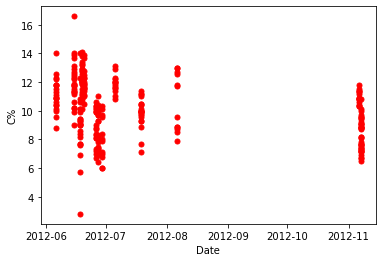

In [37]:
# Plot samples per date
plt.plot(field_2012['Sample_date'], field_2012['OM_%w/w'], 'o', color = 'red', markersize=5)
plt.xlabel('Date')
plt.ylabel('C%')
plt.show()

Analyse the data, search for duplicates and NAs

In [42]:
# Check duplicates
bool_series = field_2012[['Easting', 'Northing']].duplicated()
print(bool_series.tolist())

In [51]:
# Check NAs in C%
field_2012['OM_%w/w'].isna().sum()

0

In [ ]:
# Save file
field_2012.to_csv('field_2012.csv')

### Year 2013

In [52]:
## Load data
field_2013 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2013-01-01_2013-12-31.csv')

In [ ]:
# Check columns
field_2013.columns.tolist()

In [56]:
# Columns to drop
drop_columns_2013 = ['comments','pH Quality', 'pH Quality Last Modified', 'SOM Quality', 'SOM Quality Last Modified', 
                     'Total-N Quality', 'Total-N Quality Last Modified', 'Total-C Quality', 'Total-C Quality Last Modified',
                    'Flume', 'GPS_Sample_Nr', 'Start_Sample_Date']

In [57]:
# Dictionary with names
dict_names_2013 = {'SOM (% of DM)': 'OM_%w/w', 
                   'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [58]:
# Drop columns
field_2013.drop(drop_columns_2013, axis = 1 , inplace = True)

In [59]:
# Rename columns
field_2013.rename(columns = dict_names_2013, inplace = True)

In [60]:
field_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        423 non-null    object 
 1   SP_ID                423 non-null    int64  
 2   sample_distance (m)  423 non-null    int64  
 3   Field                423 non-null    object 
 4   Sample_date          423 non-null    object 
 5   Sample_time          423 non-null    object 
 6   Easting              423 non-null    int64  
 7   Northing             423 non-null    int64  
 8   pH                   423 non-null    float64
 9   OM_%w/w              89 non-null     float64
 10  N_total_%w/w         89 non-null     float64
 11  C_total_%w/w         89 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 39.8+ KB


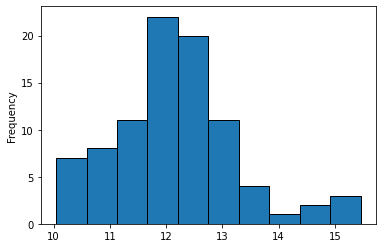

In [81]:
# Plot C% distribution
field_2013['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.show()

In [84]:
# Object to datetime
field_2013['Sample_date'] = pd.to_datetime(field_2013['Sample_date'])

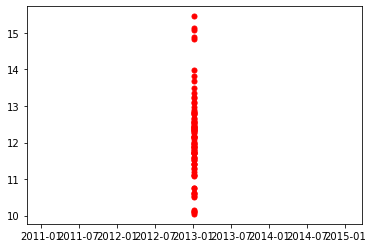

In [85]:
# Plot samples per date
plt.plot(field_2013['Sample_date'], field_2013['OM_%w/w'], 'o', color = 'red', markersize=5)
plt.show()

Analyse the data, search for duplicates and NAs

In [89]:
# Check duplicates
bool_series_13 = field_2013[['Easting', 'Northing']].duplicated()
print(bool_series_13.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [76]:
# Check NAs in C%
field_2013['OM_%w/w'].isna().sum()

334

In [75]:
field_2013.shape

(423, 12)

In [79]:
field_2013.dropna(subset = 'OM_%w/w', inplace = True)

In [88]:
field_2013.to_csv('field_2013.csv', index = False)

### Year 2016

In [90]:
## Load data
field_2016 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2016-01-01_2016-12-31.csv')

In [ ]:
# Check columns
field_2016.columns

In [91]:
# Columns to keep
columns_to_keep = ['Experiment_Id','SP_ID','sample_distance (m)','Field','Sample_date','Sample_time', 
                   'Easting','Northing','pH','Bulk density (g/cm3)',
                   'SOM (% of DM)', 'Total-N (% of DM)', 'Total-C (% of DM)']

In [92]:
# Drop other columns
field_2016 = field_2016[columns_to_keep]

In [93]:
# A glimpse on the data
field_2016.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Bulk density (g/cm3),SOM (% of DM),Total-N (% of DM),Total-C (% of DM)
0,FP059,1,50,Pecketsford,14/07/2016,16:24:00,265631.6521,99300.30838,5.60,0.56,12.9,0.525,5.390
1,FP059,2,50,Pecketsford,14/07/2016,16:20:00,265625.0000,99275.00000,5.41,0.70,10.6,0.446,4.280
2,FP059,7,50,Pecketsford,14/07/2016,16:09:00,265575.0000,99225.00000,5.49,1.06,9.7,0.404,3.667
3,FP059,9,50,Pecketsford,14/07/2016,16:15:00,265625.0000,99225.00000,5.28,1.05,10.2,0.424,4.100
4,FP059,17,50,Pecketsford,14/07/2016,16:04:00,265575.0000,99175.00000,5.51,1.05,10.0,0.403,3.885


In [94]:
# Dictionary with names
dict_names_2016 = {'Bulk density (g/cm3)':'BD_gcm3', 'SOM (% of DM)': 'OM_%w/w', 
                   'Total-N (% of DM)': 'N_total_%w/w', 'Total-C (% of DM)': 'C_total_%w/w'}

In [95]:
# Rename columns
field_2016.rename(columns = dict_names_2016, inplace = True)

In [96]:
# Info
field_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        396 non-null    object 
 1   SP_ID                396 non-null    int64  
 2   sample_distance (m)  396 non-null    int64  
 3   Field                396 non-null    object 
 4   Sample_date          396 non-null    object 
 5   Sample_time          396 non-null    object 
 6   Easting              396 non-null    float64
 7   Northing             396 non-null    float64
 8   pH                   347 non-null    float64
 9   BD_gcm3              392 non-null    float64
 10  OM_%w/w              348 non-null    float64
 11  N_total_%w/w         348 non-null    float64
 12  C_total_%w/w         348 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 40.3+ KB


In [97]:
# Convert object to datetime
field_2016['Sample_date'] = pd.to_datetime(field_2016['Sample_date'])

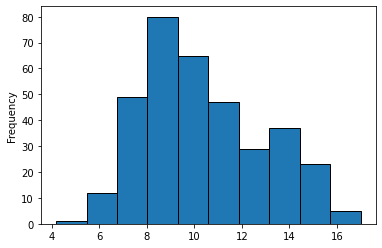

In [98]:
# Plot C% distribution
field_2016['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.show()

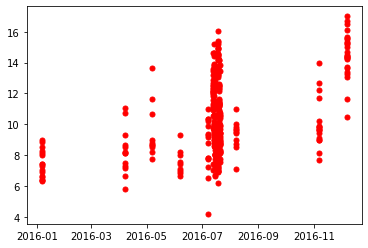

In [116]:
# Plot C% by date
plt.plot(field_2016['Sample_date'], field_2016['OM_%w/w'], 'o', color = 'red', markersize=5)
plt.show()

Analyse the data, search for duplicates and NAs

In [102]:
# Check duplicates
bool_series_16 = field_2016[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_16.tolist())

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [103]:
# Check NAs in C%
field_2016['OM_%w/w'].isna().sum()

48

In [104]:
field_2016.dropna(subset = 'OM_%w/w', inplace = True)

In [105]:
field_2016.to_csv('field_2016.csv', index = False)

### Year 2018

In [106]:
## Load data
field_2018 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2018-01-01_2018-12-31.csv')

In [107]:
# Check columns
field_2018.columns

Index(['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Flume',
       'Sample_date', 'Sample_time', 'comments', 'Start_Sample_Date',
       'GPS_Sample_Nr', 'Easting', 'Northing', 'pH', 'pH_NRM1 Quality',
       'pH_NRM1 Quality Last Modified', 'P (mg/l) (available)',
       'P_Olsen_NRM1 Quality', 'P_Olsen_NRM1 Quality Last Modified',
       'K (mg/l) (available)', 'K_NRM1 Quality',
       'K_NRM1 Quality Last Modified', 'Mg (mg/l) (available)',
       'Mg_NRM1 Quality', 'Mg_NRM1 Quality Last Modified', 'Copper (mg/l)',
       'Cu_NRM1 Quality', 'Cu_NRM1 Quality Last Modified', 'Boron (mg/l)',
       'B_NRM1 Quality', 'B_NRM1 Quality Last Modified', 'Sodium (mg/l)',
       'Na_NRM1 Quality', 'Na_NRM1 Quality Last Modified', 'Zinc (mg/l)',
       'Zn_NRM1 Quality', 'Zn_NRM1 Quality Last Modified', 'Calcium (mg/l)',
       'Ca_NRM1 Quality', 'Ca_NRM1 Quality Last Modified', 'Molybdenum (mg/l)',
       'Mo_NRM1 Quality', 'Mo_NRM1 Quality Last Modified', 'Iron (mg/l)',
       '

In [108]:
# Columns to keep
columns_to_keep2018 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [109]:
# Keep the columns
field_2018 = field_2018[columns_to_keep2018]

In [110]:
# Dictionary with column names
dict_names_2018 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [111]:
# Rename columns
field_2018.rename(columns = dict_names_2018 , inplace = True)

In [112]:
# Info
field_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        294 non-null    object 
 1   SP_ID                294 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                294 non-null    object 
 4   Sample_date          294 non-null    object 
 5   Sample_time          294 non-null    object 
 6   Easting              294 non-null    float64
 7   Northing             294 non-null    float64
 8   pH                   84 non-null     float64
 9   conductivity_uScm    80 non-null     float64
 10  OM_%w/w              84 non-null     float64
 11  N_total_%w/w         84 non-null     float64
 12  C_total_%w/w         84 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 30.0+ KB


In [113]:
# Convert object to datetime
field_2018['Sample_date'] = pd.to_datetime(field_2018['Sample_date'])

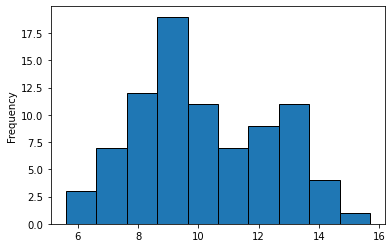

In [127]:
# Plot C% distribution
field_2018['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.show()

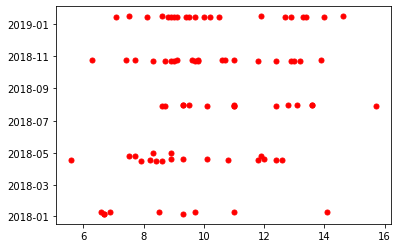

In [128]:
# Plot C% by date
plt.plot(field_2018['OM_%w/w'], field_2018['Sample_date'], 'o', color = 'red', markersize=5)
plt.show()

Analyse the data, search for duplicates and NAs

In [119]:
# Check duplicates
bool_series_18 = field_2018[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_18.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [126]:
# Check NAs in C%
field_2018['C_total_%w/w'].isna().sum()

0

In [125]:
field_2018.shape

(84, 13)

In [124]:
field_2018.dropna(subset = 'OM_%w/w', inplace = True)

In [129]:
field_2018.to_csv('field_2018.csv', index = False)

### Year 2019

In [130]:
## Load data
field_2019 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2019-01-01_2019-12-31.csv')

In [ ]:
# Check columns
field_2019.columns.tolist()

In [133]:
# Columns to keep
columns_to_keep2019 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [134]:
# Remobe other columns
field_2019 = field_2019[columns_to_keep2019]

In [135]:
# A glimpse on the dataset
field_2019.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Conductivity (uS/cm),Organic matter LOI (%w/w),Total N (%w/w) Soil,Total C (%w/w) Soil
0,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:01:00,265650.7,99239.591,NaN,NaN,NaN,NaN,NaN
1,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:02:00,265576.3,99180.488,NaN,NaN,NaN,NaN,NaN
2,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:03:00,265572.8,99122.300,NaN,NaN,NaN,NaN,NaN
3,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:04:00,265617.2,99169.389,NaN,NaN,NaN,NaN,NaN
4,NW702-SP,19,NaN,Pecketsford,18/03/2019,12:05:00,265659.1,99203.655,NaN,NaN,NaN,NaN,NaN


In [136]:
# Dictionary with column names
dict_names_2019 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [137]:
# Rename columns
field_2019.rename(columns = dict_names_2019, inplace = True)

In [138]:
# Info
field_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        403 non-null    object 
 1   SP_ID                403 non-null    int64  
 2   sample_distance (m)  27 non-null     float64
 3   Field                403 non-null    object 
 4   Sample_date          403 non-null    object 
 5   Sample_time          403 non-null    object 
 6   Easting              403 non-null    float64
 7   Northing             403 non-null    float64
 8   pH                   166 non-null    float64
 9   conductivity_uScm    162 non-null    float64
 10  OM_%w/w              166 non-null    float64
 11  N_total_%w/w         166 non-null    float64
 12  C_total_%w/w         166 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 41.1+ KB


In [139]:
# Convert object to datetime
field_2019['Sample_date'] = pd.to_datetime(field_2019['Sample_date'])

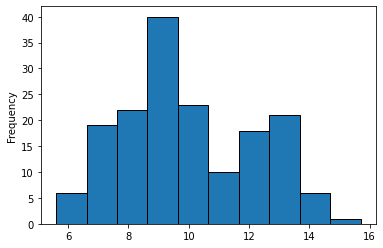

In [140]:
# Plot C% distribution
field_2019['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.show()

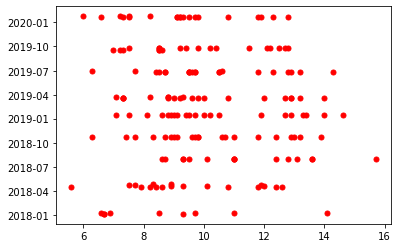

In [141]:
# Plot C% by date
plt.plot(field_2019['OM_%w/w'], field_2019['Sample_date'], 'o', color = 'red', markersize = 5)
plt.show()

Analyse the data, search for duplicates and NAs

In [144]:
# Check duplicates
bool_series_19 = field_2019[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_19.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [149]:
# Check NAs in C%
field_2019['OM_%w/w'].isna().sum()

0

In [150]:
field_2019.shape

(166, 13)

In [148]:
field_2019.dropna(subset = 'OM_%w/w', inplace = True)

In [151]:
field_2019.to_csv('field_2019.csv', index = False)

### Year 2020

In [152]:
## Load data
field_2020 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2020-01-01_2020-12-31.csv')

In [153]:
# Check the columns
field_2020.columns

Index(['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Flume',
       'Sample_date', 'Sample_time', 'comments', 'Start_Sample_Date',
       'GPS_Sample_Nr', 'Easting', 'Northing', 'pH', 'pH_NRM1 Quality',
       'pH_NRM1 Quality Last Modified', 'P (mg/l) (available)',
       'P_Olsen_NRM1 Quality', 'P_Olsen_NRM1 Quality Last Modified',
       'K (mg/l) (available)', 'K_NRM1 Quality',
       'K_NRM1 Quality Last Modified', 'Mg (mg/l) (available)',
       'Mg_NRM1 Quality', 'Mg_NRM1 Quality Last Modified', 'Copper (mg/l)',
       'Cu_NRM1 Quality', 'Cu_NRM1 Quality Last Modified', 'Boron (mg/l)',
       'B_NRM1 Quality', 'B_NRM1 Quality Last Modified', 'Sodium (mg/l)',
       'Na_NRM1 Quality', 'Na_NRM1 Quality Last Modified', 'Zinc (mg/l)',
       'Zn_NRM1 Quality', 'Zn_NRM1 Quality Last Modified', 'Calcium (mg/l)',
       'Ca_NRM1 Quality', 'Ca_NRM1 Quality Last Modified', 'Molybdenum (mg/l)',
       'Mo_NRM1 Quality', 'Mo_NRM1 Quality Last Modified', 'Iron (mg/l)',
       '

In [154]:
# Columns to keep
columns_to_keep2020 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [155]:
# Dictionary with names
dict_names_2020 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [156]:
# Remove other columns
field_2020 = field_2020[columns_to_keep2020]

In [157]:
# A glimpse on the dataset
field_2020.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Conductivity (uS/cm),Organic matter LOI (%w/w),Total N (%w/w) Soil,Total C (%w/w) Soil
0,NW702-S,19,NaN,Pecketsford,18/03/2019,12:00:00,265618.86,99134.54,6.3,2047,9.2,0.412,4.24
1,NW702-S,68,NaN,Little Pecketsford,18/03/2019,12:00:00,265698.45,99004.41,6.0,2041,7.3,0.342,3.23
2,NW702-S,2002,NaN,Great Field,18/03/2019,12:00:00,265690.12,98829.40,6.0,2020,8.8,0.394,3.94
3,NW702-S,2004,NaN,Ware Park,19/03/2019,12:00:00,265791.65,98584.10,6.0,2025,7.3,0.322,3.12
4,NW702-S,2003,NaN,Poor Field,19/03/2019,12:00:00,265547.77,98594.88,6.1,2017,9.8,0.423,4.35


In [158]:
# Rename columns
field_2020.rename(columns = dict_names_2020, inplace = True)

In [159]:
# Info
field_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experiment_Id        142 non-null    object 
 1   SP_ID                142 non-null    int64  
 2   sample_distance (m)  0 non-null      float64
 3   Field                142 non-null    object 
 4   Sample_date          142 non-null    object 
 5   Sample_time          142 non-null    object 
 6   Easting              142 non-null    float64
 7   Northing             142 non-null    float64
 8   pH                   142 non-null    float64
 9   conductivity_uScm    142 non-null    int64  
 10  OM_%w/w              142 non-null    float64
 11  N_total_%w/w         142 non-null    float64
 12  C_total_%w/w         142 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 14.5+ KB


In [160]:
# Convert object to datetime
field_2020['Sample_date'] = pd.to_datetime(field_2020['Sample_date'])

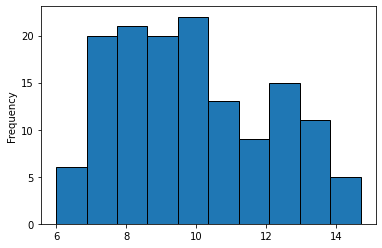

In [161]:
# Plot C% distribution
field_2020['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.show()

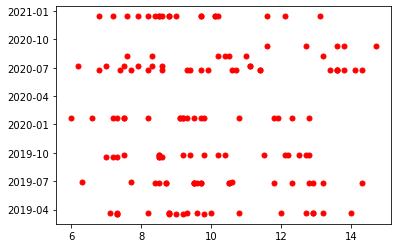

In [162]:
# Plot C% by date
plt.plot(field_2020['OM_%w/w'], field_2020['Sample_date'], 'o', color = 'red', markersize = 5)
plt.show()

In [163]:
# Check duplicates
bool_series_20 = field_2020[['Sample_date','Easting', 'Northing']].duplicated()
print(bool_series_20.tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


### Year 2021

In [164]:
## Load data
field_2021 = pd.read_csv('Field Survey Data_Format 1_Soil Survey_2021-01-01_2021-12-31.csv')

In [165]:
# Check the columns
field_2021.columns

Index(['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field', 'Flume',
       'Sample_date', 'Sample_time', 'comments', 'Start_Sample_Date',
       'GPS_Sample_Nr', 'Easting', 'Northing', 'pH', 'pH_NRM1 Quality',
       'pH_NRM1 Quality Last Modified', 'P (mg/l) (available)',
       'P_Olsen_NRM1 Quality', 'P_Olsen_NRM1 Quality Last Modified',
       'K (mg/l) (available)', 'K_NRM1 Quality',
       'K_NRM1 Quality Last Modified', 'Mg (mg/l) (available)',
       'Mg_NRM1 Quality', 'Mg_NRM1 Quality Last Modified', 'Copper (mg/l)',
       'Cu_NRM1 Quality', 'Cu_NRM1 Quality Last Modified', 'Boron (mg/l)',
       'B_NRM1 Quality', 'B_NRM1 Quality Last Modified', 'Sodium (mg/l)',
       'Na_NRM1 Quality', 'Na_NRM1 Quality Last Modified', 'Zinc (mg/l)',
       'Zn_NRM1 Quality', 'Zn_NRM1 Quality Last Modified', 'Calcium (mg/l)',
       'Ca_NRM1 Quality', 'Ca_NRM1 Quality Last Modified', 'Molybdenum (mg/l)',
       'Mo_NRM1 Quality', 'Mo_NRM1 Quality Last Modified', 'Iron (mg/l)',
       '

In [166]:
# Columns to keep
columns_to_keep2021 = ['Experiment_Id', 'SP_ID', 'sample_distance (m)', 'Field',  'Sample_date', 'Sample_time',
                       'Easting', 'Northing', 'pH','Conductivity (uS/cm)', 'Organic matter LOI (%w/w)', 'Total N (%w/w) Soil',
                      'Total C (%w/w) Soil']

In [167]:
# Dictionary with names
dict_names_2021 = {'Conductivity (uS/cm)':'conductivity_uScm', 'Organic matter LOI (%w/w)': 'OM_%w/w', 
                   'Total N (%w/w) Soil': 'N_total_%w/w', 'Total C (%w/w) Soil': 'C_total_%w/w'}

In [168]:
# Remove other columns
field_2021 = field_2021[columns_to_keep2021]

In [169]:
# A glimpse on the dataset
field_2021.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,Conductivity (uS/cm),Organic matter LOI (%w/w),Total N (%w/w) Soil,Total C (%w/w) Soil
0,NW752-2SP-1,2011,NaN,Higher Wyke Moor,03/09/2021,12:00:00,266114.792,97558.471,NaN,NaN,NaN,NaN,NaN
1,NW752-2SP-1,2012,NaN,Middle Wyke Moor,03/09/2021,12:00:00,266371.050,97681.779,NaN,NaN,NaN,NaN,NaN
2,NW752-2SP-1,2010,NaN,Lower Wyke Moor,14/09/2021,12:00:00,266432.495,97871.352,NaN,NaN,NaN,NaN,NaN
3,NW752-2SP-1,2013,NaN,Dairy South,14/09/2021,12:00:00,266062.963,98059.804,NaN,NaN,NaN,NaN,NaN
4,NW752-2SP-1,2016,NaN,Dairy East,13/09/2021,12:00:00,266285.532,98180.026,NaN,NaN,NaN,NaN,NaN


In [170]:
# Rename columns
field_2021.rename(columns = dict_names_2021, inplace = True)

In [171]:
# Convert object to datetime
field_2021['Sample_date'] = pd.to_datetime(field_2021['Sample_date'])

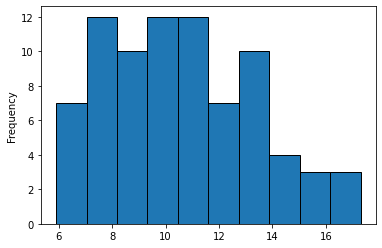

In [172]:
# Plot C% distribution
field_2021['OM_%w/w'].plot(kind = 'hist', ec = 'black')
plt.show()

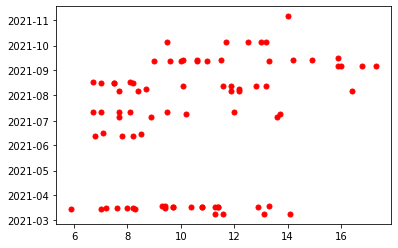

In [173]:
# Plot C% by date
plt.plot(field_2021['OM_%w/w'], field_2021['Sample_date'], 'o', color = 'red', markersize = 5)
plt.show()

### Joining all the datasets

In [174]:
# Create a list with 
list_df = [field_2012, field_2013, field_2016, field_2018, field_2019, field_2020, field_2021]
list_df 

[    Experiment_Id  SP_ID  sample_distance (m)           Field Sample_date  \
 0           FP003      1                   50     Pecketsford  2012-06-06   
 1           FP003      2                   50     Pecketsford  2012-06-06   
 2           FP003      7                   50     Pecketsford  2012-06-06   
 3           FP003      9                   50     Pecketsford  2012-06-06   
 4           FP003     17                   50     Pecketsford  2012-06-06   
 ..            ...    ...                  ...             ...         ...   
 259         FP003   1110                   50  Longlands East  2012-06-29   
 260         FP003   1112                   50  Longlands East  2012-06-29   
 261         FP003   1118                   50  Longlands East  2012-06-29   
 262         FP003   1120                   50  Longlands East  2012-06-29   
 263         FP003   1127                   50  Longlands East  2012-06-29   
 
     Sample_time  Easting  Northing    pH  BD_gcm3  OM_%w/w  N

In [175]:
# Concatenate the list
result_df = pd.concat(list_df)

In [176]:
# A glimpse on the concatenated data
result_df.head()

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm
0,FP003,1,50.0,Pecketsford,2012-06-06,12:00:00,265632.0,99300.0,5.18,0.916,10.1,0.51,4.742,NaN
1,FP003,2,50.0,Pecketsford,2012-06-06,12:00:00,265625.0,99275.0,5.23,0.943,10.4,0.55,4.980,NaN
2,FP003,7,50.0,Pecketsford,2012-06-06,12:00:00,265575.0,99225.0,5.54,0.948,11.8,0.64,5.610,NaN
3,FP003,9,50.0,Pecketsford,2012-06-06,12:00:00,265625.0,99225.0,5.12,0.857,10.9,0.54,4.510,NaN
4,FP003,17,50.0,Pecketsford,2012-06-06,12:00:00,265575.0,99175.0,5.68,0.946,11.5,0.59,5.340,NaN


In [193]:
# Check duplicates
result_df['duplicated'] = result_df[['Sample_date','Easting', 'Northing']].duplicated()

In [216]:
result_df.to_csv('results_with_duplicates.csv', index = False)

In [220]:
result_df.shape

(1172, 15)

In [234]:
result_df_without_duplicates = result_df[result_df['duplicated'] == False].reset_index(drop = True)

In [235]:
result_df_without_duplicates

,Experiment_Id,SP_ID,sample_distance (m),Field,Sample_date,Sample_time,Easting,Northing,pH,BD_gcm3,OM_%w/w,N_total_%w/w,C_total_%w/w,conductivity_uScm,duplicated
0,FP003,1,50.0,Pecketsford,2012-06-06,12:00:00,265632.0000,99300.00000,5.18,0.916,10.1,0.510,4.742,NaN,False
1,FP003,2,50.0,Pecketsford,2012-06-06,12:00:00,265625.0000,99275.00000,5.23,0.943,10.4,0.550,4.980,NaN,False
2,FP003,7,50.0,Pecketsford,2012-06-06,12:00:00,265575.0000,99225.00000,5.54,0.948,11.8,0.640,5.610,NaN,False
3,FP003,9,50.0,Pecketsford,2012-06-06,12:00:00,265625.0000,99225.00000,5.12,0.857,10.9,0.540,4.510,NaN,False
4,FP003,17,50.0,Pecketsford,2012-06-06,12:00:00,265575.0000,99175.00000,5.68,0.946,11.5,0.590,5.340,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,NW752-3S,2009,NaN,Golden Rove,2021-08-12,12:00:00,265953.4417,97967.65381,5.80,NaN,11.6,0.549,5.240,2012.0,False
1001,NW752-3S,2007,NaN,Orchard Dean North,2021-08-12,12:00:00,265678.1911,98112.25632,5.90,NaN,13.2,0.629,5.970,2014.0,False
1002,NW752-3S,2008,NaN,Orchard Dean South,2021-08-12,12:00:00,265666.1468,98008.84146,5.80,NaN,11.9,0.580,5.370,2018.0,False
1003,NW752-3S,2017,NaN,Dairy North,2021-09-12,12:00:00,266282.1266,98358.20591,5.80,NaN,13.3,0.651,5.930,2015.0,False


In [236]:
# Info
result_df_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Experiment_Id        1005 non-null   object        
 1   SP_ID                1005 non-null   int64         
 2   sample_distance (m)  699 non-null    float64       
 3   Field                1005 non-null   object        
 4   Sample_date          1005 non-null   datetime64[ns]
 5   Sample_time          1005 non-null   object        
 6   Easting              1005 non-null   float64       
 7   Northing             1005 non-null   float64       
 8   pH                   1004 non-null   float64       
 9   BD_gcm3              606 non-null    float64       
 10  OM_%w/w              1005 non-null   float64       
 11  N_total_%w/w         1005 non-null   float64       
 12  C_total_%w/w         1005 non-null   float64       
 13  conductivity_uScm    302 non-null

In [237]:
# Count the numbers of NAs in C%
result_df_without_duplicates['C_total_%w/w'].isnull().sum()

0

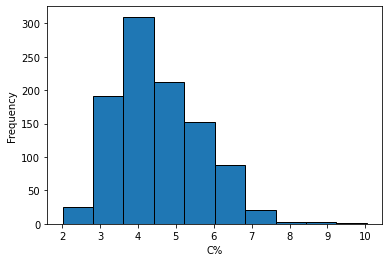

In [238]:
# Plot the histogram of C%
result_df_without_duplicates['C_total_%w/w'].plot(kind = 'hist', ec = 'black')
plt.xlabel('C%')
plt.show()

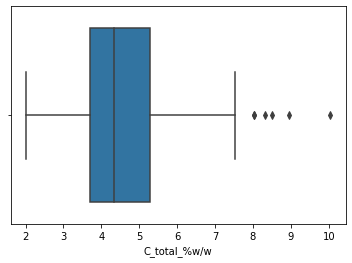

In [239]:
sns.boxplot(result_df_without_duplicates['C_total_%w/w'])
plt.show()

In [247]:
result_df_without_duplicates.drop(columns = ['duplicated'], axis = 1, inplace = True)

In [258]:
# Group by date and create summary statistics
summary_dat = result_df_without_duplicates.groupby(result_df_without_duplicates['Sample_date'].dt.year)['C_total_%w/w'].agg(['min', 'mean', 'median', 'max','std', 'count']).reset_index()

In [259]:
# A glimpse on the summary statistics
summary_dat

,Sample_date,min,mean,median,max,std,count
0,2012,2.690,4.616015,4.657,10.040,0.928946,263
1,2013,2.685,3.913382,3.891,5.165,0.464701,89
2,2016,2.011,4.575089,4.275,7.519,1.230368,347
3,2018,2.660,4.499365,4.280,7.350,1.096307,63
4,2019,2.840,4.529880,4.190,6.810,1.093772,83
5,2020,2.500,4.344000,4.165,6.840,1.047984,80
6,2021,2.760,4.845125,4.655,8.940,1.483824,80


In [260]:
# Save to csv
summary_dat.to_csv('summary_stats_per_year.csv', index = False)

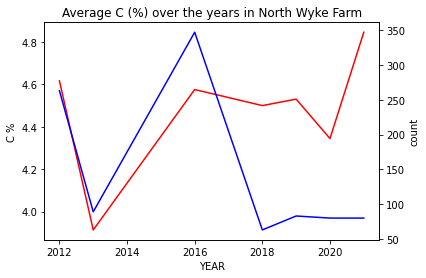

In [261]:
# Plot mean and count per year
fig, ax = plt.subplots()

ax.plot(summary_dat['Sample_date'], summary_dat['mean'], color = 'red')
plt.xlabel('YEAR')
plt.ylabel('C %')

ax2 = ax.twinx()
ax2.plot(summary_dat['Sample_date'], summary_dat['count'], color = 'blue')
plt.ylabel('count')


plt.title('Average C (%) over the years in North Wyke Farm')
plt.show()

In [262]:
# Group by Sample_date and count
group_date = result_df_without_duplicates[['Sample_date', 'C_total_%w/w']].groupby(['Sample_date']).count().reset_index()

In [264]:
group_date

,Sample_date,C_total_%w/w
0,2012-06-06,20
1,2012-06-15,24
2,2012-06-18,24
3,2012-06-19,27
4,2012-06-20,17
...,...,...
87,2021-09-13,2
88,2021-09-14,3
89,2021-09-16,1
90,2021-10-06,5


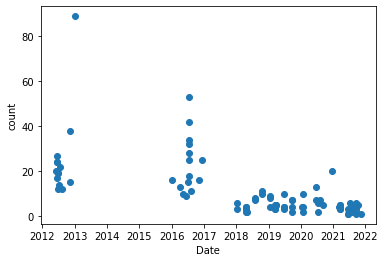

In [263]:
# Plot the count of samples per date
plt.plot(group_date['Sample_date'], group_date['C_total_%w/w'], 'o')
plt.xlabel('Date')
plt.ylabel('count')
plt.show()

In [265]:
# Save to csv
group_date.to_csv('number_samples_per_date.csv')

In [266]:
# Save the final dataset
result_df_without_duplicates.to_csv('final_dataset_RR.csv', index = False)

In [409]:
# End